# imdb

Import IMDB review data from Keras data sets.  Limit to the `10000` most frequently used words.

Data is a list of word indices (see example below)

Labels:
- `0` for negative
- `1` for positive

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


### Decoding a review

Simple example of decoding a review to more clearly illustrate the data model

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # map integer indices to words
word_index_offset = 3 # offset of 3 due to reserved indices for padding, start of sequence, and unknown
decoded_review = ' '.join([reverse_word_index.get(i - word_index_offset, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Turning the lists into 10k-rank tensors using numpy for clarity. Values for provided indices will have values of `1`, otherwise, they will be `0`.

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Build model
`16` is the number of hidden units of the layer
Hidden units are a dimension in the representation of space in the layer

`relu` activation is equivalent to:
```
output = relu(dot(W, input) + b)
```

In this case, having `16` hidden units will project the input data 16-dimensional representation space. The more hidden units, the more freedom of interpretation the model is allowed (but this comes at the cost of computational time and complexity).

The output layer uses `sigmoid` activation to output a score between zero and one.

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Activation functions
Without the use of `relu` (also called `non-linearity`) here, output would effectively be
```
output = dot(W, input) + b
```
Meaning that the layer could only learn linear ("affine") transformations.  Such a hypothesis space is too restricted and adding layers wouldn't extend it.  `relu` is a popular non-linear activation function that affords a richer hypothesis space.

### Loss functions

Since the output is a binary classification (`sigmoid` activation), a good choice for the loss function is `binary_crossentropy`. Crossentropy is from Information Theory and quantifies distances between probability distributions.

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model using mini-batches of size 512. Passing in `validation_data` allows the model to monitor loss and accuracy.

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.5067 - acc: 0.7843 - val_loss: 0.3787 - val_acc: 0.8698
Epoch 2/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.3000 - acc: 0.9048 - val_loss: 0.2999 - val_acc: 0.8905
Epoch 3/20
15000/15000 [==============================] - 1s 49us/step - loss: 0.2174 - acc: 0.9285 - val_loss: 0.3089 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1745 - acc: 0.9434 - val_loss: 0.2836 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1420 - acc: 0.9545 - val_loss: 0.2852 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 1s 62us/step - loss: 0.1148 - acc: 0.9653 - val_loss: 0.3141 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 1s 57us/step - loss: 0.0979 - acc: 0.9709 - val_loss: 0.3129 - val_ac

### Plotting training and validation

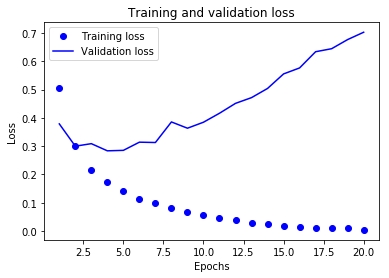

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # `bo` == blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # `b` == blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
plt.clf() # clear the plot

<Figure size 432x288 with 0 Axes>

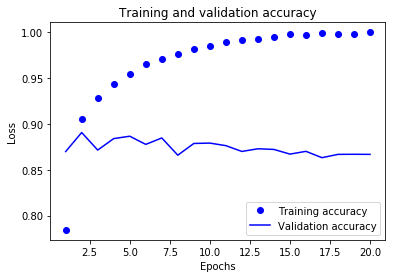

In [12]:
value_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, value_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As illustrated, the loss decreases over time and the accuracy increases.  One interesting observation is how the loss is minimized and the accuracy peaks around four epochs.  This could indicate that we're overfitting beyond three or four epochs.

## Adjusting our approach

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.4742 - acc: 0.8210
Epoch 2/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.2676 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2034 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step
[0.31099323163986203, 0.87624]


In [14]:
model.predict(x_test)

array([[0.16273853],
       [0.9998447 ],
       [0.4099434 ],
       ...,
       [0.08052561],
       [0.04925127],
       [0.45848015]], dtype=float32)